# Ant Colony Optimization (ACO) Algorithm

Name    : Anaz Akbar Azhar <br>
SID     : 1301213291

# kode

import library yang dibutuhkan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import math

# Fungsi F9

In [2]:
def F9(x):
    return np.sum(x**2 - 10 * np.cos(2 * np.pi * x) + 10, axis=1) # axis = 1 membantu untuk memastikan penjumlahan dilakukan untuk setiap semut secara terpisah

## Parameter

Parameter di dalam firefly algorithm ada berapa jenis seperti yang dijelaskan di bawah ini

In [3]:
# Parameters
bounds = [-50, 50] # Batas-batas wilayah pencarian solusi
num_ants = 40 # Jumlah semut dalam algoritma ACO
max_iter = 100 # Jumlah iterasi maksimum
evaporation_rate = 0.1 # Tingkat penguapan feromon pada setiap iterasi
alpha = 0.1  # Faktor randomisasi untuk pilihan jalur
beta = 0.01  # Tingkat ketertarikan terhadap makanan (food source)
food = np.array([0, 0])  # Lokasi makanan (food source)

## ACO Algorithm

In [4]:
# Ant Colony Optimization setup 
def AntColonyOptimization(bounds, num_ants, max_iter, evaporation_rate, alpha, beta, food): 
    ants = np.random.uniform(low=bounds[0], high=bounds[1], size=(num_ants, 2)) # Inisialisasi posisi semut secara acak dalam wilayah pencarian solusi
    pheromone_map = np.zeros((400, 400)) # Matriks untuk merekam jejak pheromone pada grid
    history = [] # Penyimpanan histori posisi semut pada setiap iterasi
    best_solution = None # Inisialisasi solusi terbaik
    best_fitness = np.inf # Inisialisasi fitness terbaik

    for _ in range(max_iter):
        fitness = F9(ants) # Evaluasi fitness dari setiap posisi semut
        for i, fitness_value in enumerate(fitness): # Periksa apakah terdapat solusi yang lebih baik
            if fitness_value < best_fitness:
                best_fitness = fitness_value
                best_solution = ants[i].copy()

        history.append(ants.copy()) # Simpan histori posisi semut pada setiap iterasi
        
        for i, ant in enumerate(ants): # Update posisi semut berdasarkan pheromone dan tarikan ke makanan
            move_towards_center = beta * (food - ant)
            random_walk = alpha * np.random.randn(2)
            ant += move_towards_center + random_walk

            ant = np.clip(ant, bounds[0], bounds[1]) # Batasi posisi semut dalam wilayah pencarian solusi
            
            grid_pos = ((ant - bounds[0]) / (bounds[1] - bounds[0]) * 399).astype(int) # Hitung posisi semut dalam grid pheromone_map
            pheromone_map[grid_pos[0], grid_pos[1]] += 1 / fitness[i]  # Tambahkan pheromone berdasarkan fitness semut

        pheromone_map *= (1 - evaporation_rate)  # Kurangi intensitas pheromone pada setiap iterasi

    return best_solution, best_fitness, history, pheromone_map

In [5]:
best_solution, best_fitness, history, pheromone_map = AntColonyOptimization(bounds, num_ants, max_iter, evaporation_rate, alpha, beta, food)

## Buat GIF dari data yang telah ada

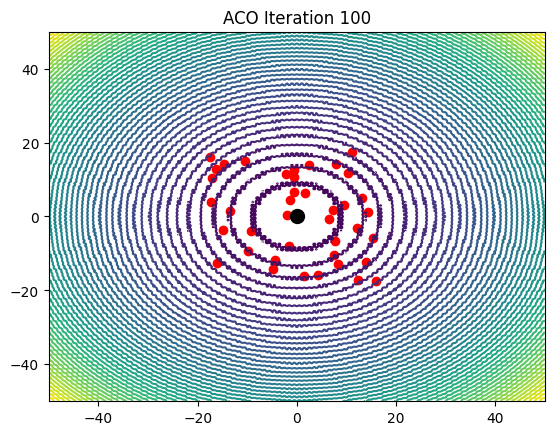

In [6]:
# Persiapan data plot kontur
X1 = np.linspace(bounds[0], bounds[1], 400) # Membuat array titik-titik pada sumbu X1 dengan 400 titik yang tersebar secara merata dalam rentang batas
X2 = np.linspace(bounds[0], bounds[1], 400) # Membuat array titik-titik pada sumbu X2 dengan 400 titik yang tersebar secara merata dalam rentang batas
X1, X2 = np.meshgrid(X1, X2) # Membuat grid dari titik-titik X1 dan X2

# Menghitung nilai fungsi objektif F9 pada setiap titik dalam grid dengan mengubah grid menjadi array 1 dimensi, 
# kemudian melakukan transformasi kolom dengan menumpuk kolom-kolom ke dalam satu array dan meratakan array tersebut kembali ke bentuk grid
Z = F9(np.column_stack([X1.ravel(), X2.ravel()])).reshape(X1.shape)

# Atur gambar dan sumbu untuk animasi
fig, ax = plt.subplots()
ax.set_xlim(bounds[0], bounds[1])
ax.set_ylim(bounds[0], bounds[1])
contour = ax.contour(X1, X2, Z, levels=50) # Plot kontur dari fungsi objektif
scatter = ax.scatter([], [], c='red')  # Titik-titik yang merepresentasikan posisi semut
food_plot = ax.scatter([food[0]], [food[1]], c='black', s=100, marker='o')  # Plot lokasi makanan

# Fungsi pembaruan untuk animasi
def update(frame):
    ax.set_title(f'ACO Iteration {frame + 1}') # Update judul plot dengan nomor iterasi
    positions = history[frame] # Ambil posisi semut dari histori pada iterasi tertentu
    scatter.set_offsets(positions) # Atur posisi semut
    return scatter,

# Buat animasi
ani = FuncAnimation(fig, update, frames=len(history), blit=True, repeat=False)

# Simpan animasi sebagai GIF
writer = PillowWriter(fps=5) 
ani.save("ant_colony_optimization_1301213291.gif", writer=writer)
plt.show()